In [1]:
import pandas as pd

In [23]:
df = pd.read_csv('output.csv',  index_col=[0])

In [24]:
df.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,lat,lng,population,density,Year
0,43,Good,Ozone,1,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
1,42,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
2,43,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
3,42,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
4,43,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022


Encoding categorical data: `Defining Parameter`, `city_ascii` and `state_name`.

In [25]:
#df['Category'] = df['Category'].astype('category')
#df['Category'] = df['Category'].cat.codes
df['Defining Parameter'] = df['Defining Parameter'].astype('category')
df['Defining Parameter'] = df['Defining Parameter'].cat.codes
df['city_ascii'] = df['city_ascii'].astype('category')
df['city_ascii'] = df['city_ascii'].cat.codes
df['state_name'] = df['state_name'].astype('category')
df['state_name'] = df['state_name'].cat.codes
df.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,lat,lng,population,density,Year
0,43,Good,2,1,25,1,35.1872,-111.6194,79624.0,428.0,2022
1,42,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022
2,43,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022
3,42,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022
4,43,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022


### Separar os dados para treino, teste e validação
Aplicaremos a função `train_test_split` duas vezes para obter os três conjuntos: treino, teste e validação.

In [5]:
from sklearn.model_selection import train_test_split

In [65]:
y = df.Category
X = df.drop('Category', axis=1)
train_ratio = 0.7
test_ratio = 0.20
validation_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=validation_ratio/(train_ratio+test_ratio))

In [7]:
# iniciando o MLFlow
import mlflow

In [ ]:
mlflow.set_experiment('air-quality-category')

### Treinamentos

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
def evaluate_model(classifier):
    acc = accuracy_score(y_test, classifier.predict(X_test))
    print("Test Accuracy: ", acc)
    precision =  precision_score(y_test, classifier.predict(X_test), average='weighted')
    print("Test Precision: ", precision)
    f1 = f1_score(y_test, classifier.predict(X_test), average='weighted')
    print("Test F1 score: ", f1)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))
    return acc, precision, f1

In [12]:
mlflow.start_run(experiment_id='1', run_name='air-quality-category')

<ActiveRun: >

#### K-nearest neighbors

In [27]:
# create and fit knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
(accuracy_knn, precision_knn, f1_knn) = evaluate_model(knn)

Test Accuracy:  0.9950871212392486
Test Precision:  0.9950818558300883
Test F1 score:  0.9950839775283945
Test Confusion Matrix:
[[177305      0    207      0      0      0]
 [     0    140      0      2      0      4]
 [   289      0  73732      0    207      0]
 [     0      0      1   6757    146     53]
 [     0      0    284    135  17434      0]
 [     0      1      0     43      0   2526]]


In [44]:
mlflow.log_metric("accuracy knn", accuracy_knn)
mlflow.log_metric("precision knn", precision_knn)
mlflow.log_metric("f1 score knn", f1_knn)

In [36]:
mlflow.sklearn.log_model(knn, 'knn')

ModelInfo(artifact_path='knn', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/058bcb52f08540af8d2df3ce9c4b9394/knn', model_uuid='5d00dd275d5d4aba9a94580d2ac80cfa', run_id='058bcb52f08540af8d2df3ce9c4b9394', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-26 16:59:59.422086', mlflow_version='1.28.0')

#### Naive Bayes

In [37]:
# create and fit naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
(accuracy_gnb, precision_gnb, f1_gnb) = evaluate_model(gnb)

Test Accuracy:  0.6400743377281874
Test Precision:  0.5368010164268918
Test F1 score:  0.5443365302709168
Test Confusion Matrix:
[[170647      0   5928      0      0    937]
 [    29     77      5     13      0     22]
 [ 64606      0   7372      0      0   2250]
 [  5536      0    825      0    266    330]
 [ 14347      0   2947      0      0    559]
 [  1579      0    336      0      0    655]]


In [48]:
mlflow.log_metric("accuracy Naive Bayes", accuracy_gnb)
mlflow.log_metric("precision Naive Bayes", precision_gnb)
mlflow.log_metric("f1 score Naive Bayes", f1_gnb)

In [40]:
mlflow.sklearn.log_model(gnb, 'gnb')

ModelInfo(artifact_path='gnb', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/058bcb52f08540af8d2df3ce9c4b9394/gnb', model_uuid='2047b2a5a797450ebbe30eaa5b547768', run_id='058bcb52f08540af8d2df3ce9c4b9394', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-26 17:03:41.588208', mlflow_version='1.28.0')

#### Multi layer perceptron

In [41]:
# create and fit MLP with scikit learn
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

C:\Users\Anna Luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
#  create and fit MLP with PyTorch

In [13]:
(accuracy_mlp, precision_mlp, f1_mlp) = evaluate_model(mlp)

In [17]:
mlflow.log_metric("accuracy MLP", accuracy_mlp)
mlflow.log_metric("rmse MLP", precision_mlp)
mlflow.log_metric("r2 MLP", f1_mlp)

In [19]:
mlflow.sklearn.log_model(mlp, 'mlp')

ModelInfo(artifact_path='mlp', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/abd0369f53534f0b9dfa68e7384c2fe2/mlp', model_uuid='56297310c8b04e9bbf0dbcb401c0b585', run_id='abd0369f53534f0b9dfa68e7384c2fe2', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-21 18:28:33.858684', mlflow_version='1.28.0')

#### Random forest

In [47]:
# create and fit Random Forest
random_forest = RandomForestClassifier(max_depth=4, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [49]:
(accuracy_randForest, precision_randForest, f1_randForest) = evaluate_model(random_forest)

Test Accuracy:  0.9042275106887341


C:\Users\Anna Luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Precision:  0.8949585065936235
Test F1 score:  0.8662106842182286
Test Confusion Matrix:
[[177512      0      0      0      0      0]
 [     0      0    146      0      0      0]
 [     0      0  74228      0      0      0]
 [     0      0   6957      0      0      0]
 [     0      0  17073      0    780      0]
 [     0      0   2570      0      0      0]]


In [50]:
mlflow.log_metric("accuracy random forest", accuracy_randForest)
mlflow.log_metric("precision random forest", precision_randForest)
mlflow.log_metric("f1 score random forest", f1_randForest)

In [51]:
mlflow.sklearn.log_model(random_forest, 'random forest')

ModelInfo(artifact_path='random forest', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/058bcb52f08540af8d2df3ce9c4b9394/random forest', model_uuid='99d4a53d5a75416cac8b50d8914fbafc', run_id='058bcb52f08540af8d2df3ce9c4b9394', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-26 17:14:41.610216', mlflow_version='1.28.0')

In [54]:
mlflow.end_run()

### Seleção de hiper-parâmetros

In [22]:
from sklearn.model_selection import GridSearchCV

#### KNN

In [23]:
params = {
    'metric': ['euclidean', 'minkowski'],
    'n_neighbors': [2, 3, 5, 7, 10]
}

In [26]:
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy')

In [27]:
grid_search.fit(X_valid, y_valid)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [2, 3, 5, 7, 10]},
             scoring='accuracy', verbose=1)

In [41]:
best_params_knn = grid_search.best_params_

#### Gaussian NB

In [30]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

params_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search_gnb = GridSearchCV(estimator=gnb, 
                 param_grid=params_gnb, 
                 cv=4, 
                 verbose=1, 
                 scoring='accuracy') 
Data_transformed = PowerTransformer().fit_transform(X_valid)
grid_search_gnb.fit(Data_transformed, y_valid);

grid_search_gnb.best_estimator_


C:\Users\Anna Luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


GaussianNB(var_smoothing=2.310129700083158e-05)

In [31]:
best_params_gnb = grid_search_gnb.best_params_

#### Multi-layer perceptron

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

* Atenção: o scikit learn não foi indicado para uso com MLP, então vamos trocar pelo PyTorch

#### Random Forest

In [32]:
distributions_2 = {
    'max_depth': [1,2,4, 7, 10]
}

In [35]:
random_search_randForest = RandomizedSearchCV(random_forest, distributions_2, random_state=0)
search_randForest = random_search_randForest.fit(X_valid, y_valid)
search_randForest.best_params_

C:\Users\Anna Luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': 10}

### Selecionar melhor modelo e aplicar otimização de acordo com os melhores hiper-parâmetros

In [54]:
print(best_params_knn)

{'metric': 'euclidean', 'n_neighbors': 3}


In [59]:
knn_best_estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=3)
knn_best_estimator.fit(X_train, y_train)
y_pred_best_knn = knn_best_estimator.predict(X_test)

In [60]:
print(best_params_gnb)

{'var_smoothing': 2.310129700083158e-05}


In [61]:
gnb_best_estimator = GaussianNB(var_smoothing=2.310129700083158e-05)
gnb_best_estimator.fit(X_train, y_train)
y_pred_best_gnb = gnb_best_estimator.predict(X_test)

In [ ]:
# colocar aqui os melhores hiper parametros para o mlp

In [ ]:
mlp_best_estimator = MLPClassifier()
mlp_best_estimator.fit(X_train, y_train)
y_pred_best_mlp = mlp_best_estimator.predict(X_test)

In [49]:
print(search_randForest.best_params_)

{'max_depth': 10}


In [62]:
randForest_best_estimator = RandomForestClassifier(max_depth=10)
randForest_best_estimator.fit(X_train, y_train)
y_pred_best_rf = randForest_best_estimator.predict(X_test)

Logar métricas resultantes no MLFlow:

## Clustering
Vamos implementar o algoritmo k-means para obter uma clusterização dos dados.

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters = 6, random_state=0, n_init=20)

In [71]:
kmeans.fit(X_train, y_train)

KMeans(n_clusters=6, n_init=20, random_state=0)

In [80]:
labels=["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]
y_pred_kmeans = kmeans.predict(X_test)

In [56]:
import sklearn.metrics
import seaborn as sns

In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_kmeans)

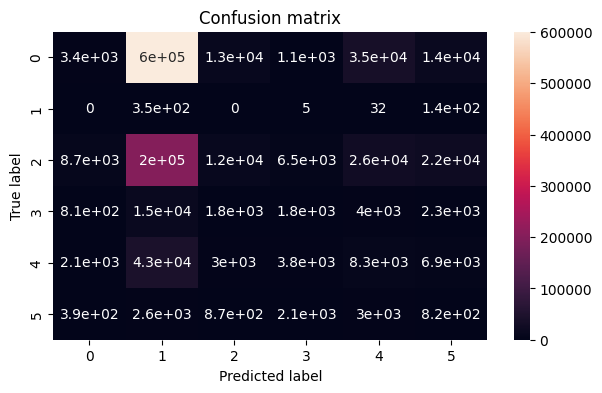

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel('Predicted label')
plt.show()